In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data
data = pd.read_csv("C:\\Lachin\\NIBM Dip\\Python\\Housing prices.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Introduction About the Dataset

- Dataset is about Hosuing prices and the variables which is related with the price determmination.
- It has 1460 rows of data and 81 columns.
- Important variables can be identified as Pool area, screen porch, 3sn proch, enclosed porch, wood deck sf and open porch sf which assume to have a strong correlation.

In [4]:
print("Missing values\n")
for column in data.columns:
    if (data[column].isnull().sum() !=0):
        print("{} has {} missing values".format(column, data[column].isnull().sum()))

Missing values

LotFrontage has 259 missing values
Alley has 1369 missing values
MasVnrType has 8 missing values
MasVnrArea has 8 missing values
BsmtQual has 37 missing values
BsmtCond has 37 missing values
BsmtExposure has 38 missing values
BsmtFinType1 has 37 missing values
BsmtFinType2 has 38 missing values
Electrical has 1 missing values
FireplaceQu has 690 missing values
GarageType has 81 missing values
GarageYrBlt has 81 missing values
GarageFinish has 81 missing values
GarageQual has 81 missing values
GarageCond has 81 missing values
PoolQC has 1453 missing values
Fence has 1179 missing values
MiscFeature has 1406 missing values


In [5]:
data['Alley'].fillna('No Access', inplace=True)

In [6]:
data['Alley'].value_counts()

No Access    1369
Grvl           50
Pave           41
Name: Alley, dtype: int64

In [7]:
#selecting only the varaibles which are not objects
df_intfloat = data.select_dtypes(exclude = 'object')
df_intfloat.shape

(1460, 38)

In [8]:
df_intfloat.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

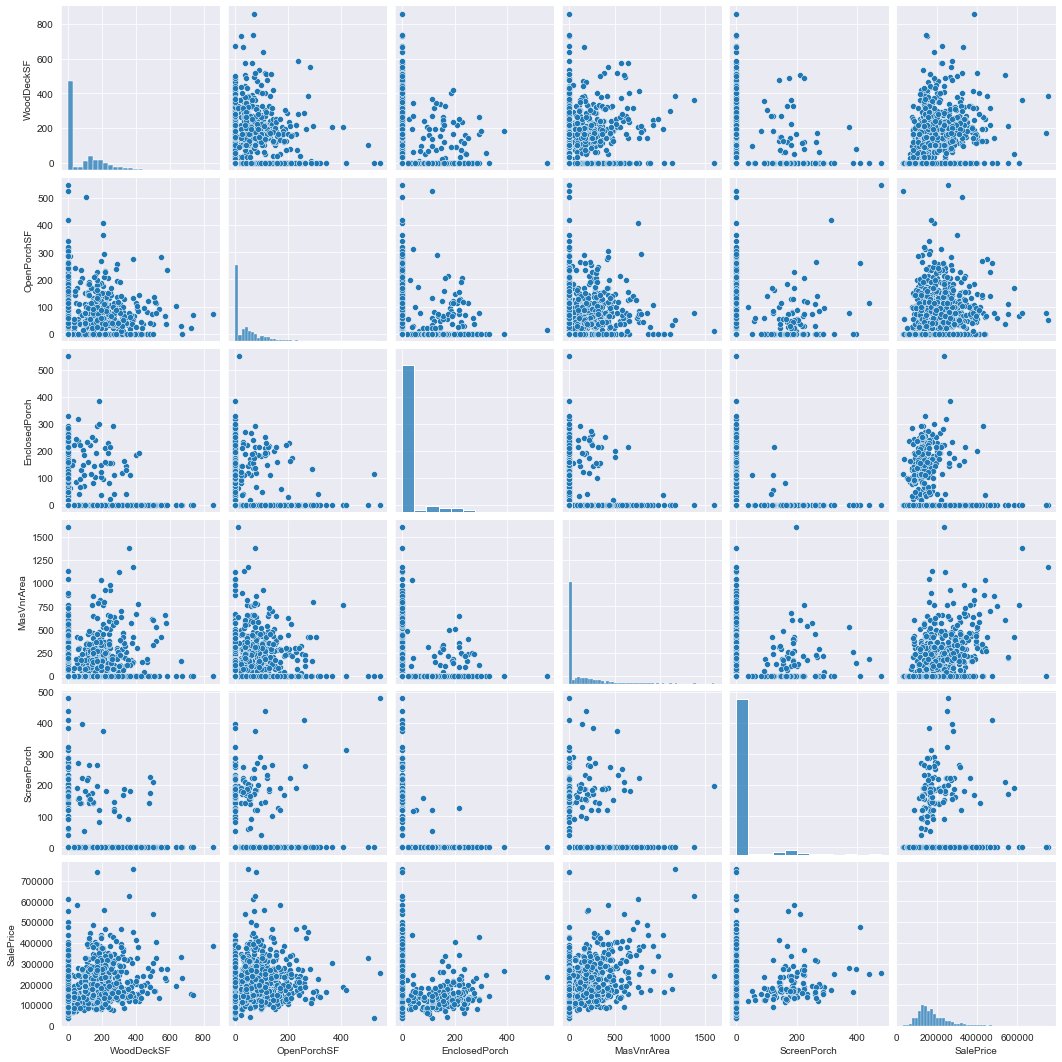

In [9]:
sns.set_style('darkgrid')
sns.pairplot(data[['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'MasVnrArea', 'ScreenPorch','SalePrice']], dropna=True);

### Pairplot to Identify Relationships

- Varaiables selected for the pairplot are 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',  'ScreenPorch', 'SalePrice'.
- According to the pairplot, there is a moderate positive linear relationship between the sales price and other selected variables
- There are more positive relationships bsetween other variables also. Ex: There is a moderate positive linear relationship between MasVnrArea (Masonry veneer area in square feet) and WooddeckSF (wood deck area in square feet).
- Also there is a moderate positive linear relationship between OpenporchSF (Open porch area in sqaure feet) and WooddeskSF( wood deck are in square feet).
- About the distribution of the selected variables, sales price variable  can be assumed to have normally distrubuted but other variables are not presenting any specific distributions.


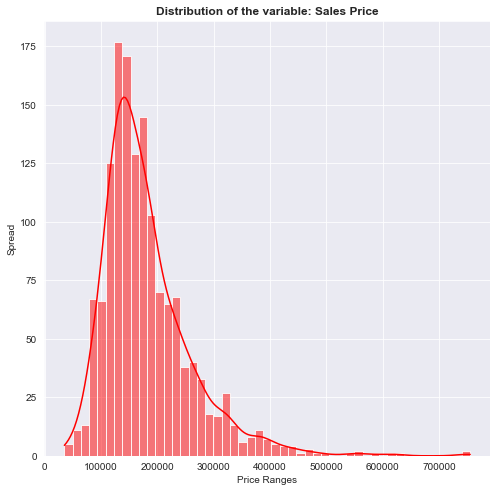

In [10]:
font_dict = dict(fontsize=12, fontweight=800)
label_dcit = dict(fontsize = 10, fontweight=500)
plt.figure(figsize = (8,8))
sns.histplot(data['SalePrice'], kde=True, color = 'red')
plt.xlabel('Price Ranges',label_dcit)
plt.ylabel('Spread', label_dcit)
plt.title('Distribution of the variable: Sales Price',**font_dict);

### Distribution of the variable: Sales Price

- Sales price varaibles is assumed to have normally distributed but right tailed of the distribution have extended which can visualize the qualities of postive kurtosis

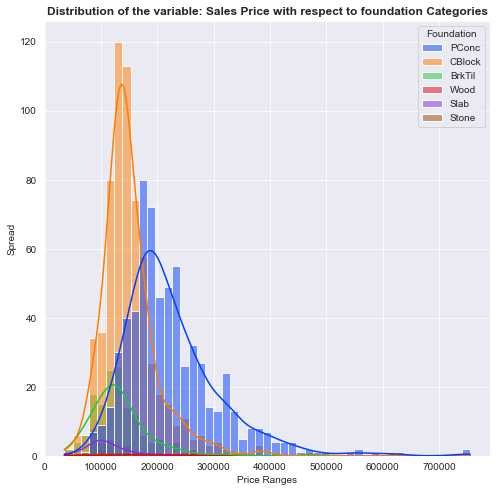

In [11]:
font_dict = dict(fontsize=12, fontweight=800)
label_dcit = dict(fontsize = 10, fontweight=500)
plt.figure(figsize=(8,8))
sns.histplot(data = data, x = 'SalePrice', hue = 'Foundation', kde= True, palette='bright' )
plt.xlabel('Price Ranges',label_dcit)
plt.ylabel('Spread', label_dcit)
plt.title('Distribution of the variable: Sales Price with respect to foundation Categories',**font_dict);

### Distributions of Sales Price with different Foundation Categories

- Wood foundation and Stone foundation have very less data therefore their distributions are not considered.
- Poured concrete foundations, clinder block foundation, brick & tile and slab foundations have visibile ditributions which are approximately closer to the normal distribution.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


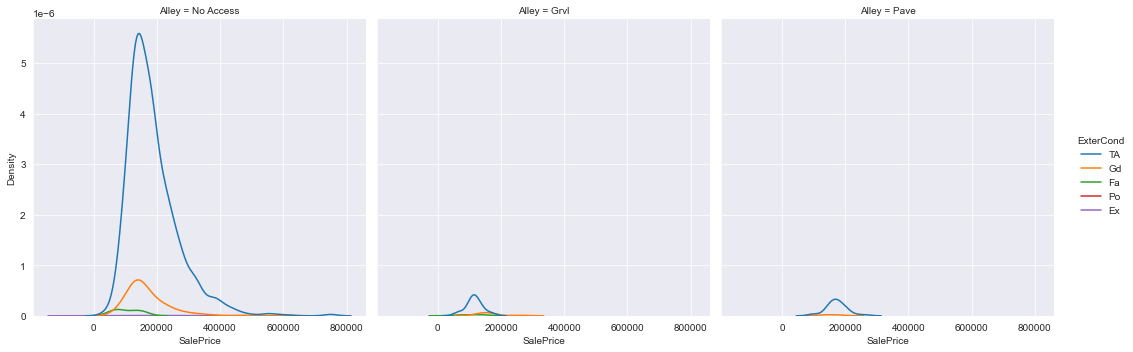

In [12]:
sns.displot(data = data, x = 'SalePrice', hue = 'ExterCond', col = 'Alley', kind = 'kde');

### Distribution of the variable: Sales Price with the Exterior Content and Alley

- Densities of sales price along with the Poor extension and Excellent extention not considerable when compared to other three categories with Alley variable.
- Average/typical density is having some positive kurtosis characteristics.
- Densitites of Good and fair categories are having some density distributions but not specific ones.

In [13]:
data['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

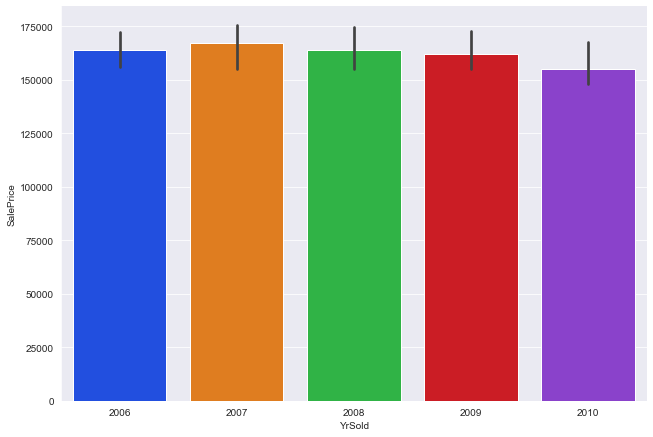

In [14]:
median = lambda x: np.percentile(x,50)
sns.catplot(data = data, x = 'YrSold', y = 'SalePrice', kind = 'bar', height = 6, aspect=1.5, estimator=median, palette='bright');

### Bar plot for each year with median sales price estimation

- Highest median estimation is recorded in the year of 2007.
- Lowest estimation is recorded in the year of 2010.
- Since confidence interval is presenting how much uncertainity is there in the estimator, median estimation of sales prices over the year 2006 is more precise compared to others becuase it's interval is the narrowest one.

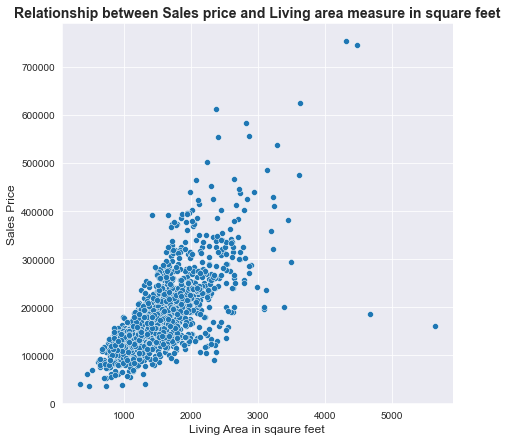

In [15]:
plt.figure(figsize=(7,7))
title_kws = dict(fontsize = 14, fontweight = 800)
label_kws = dict(fontsize = 12, fontweight = 500)
sns.scatterplot(data = data, x = 'GrLivArea', y = 'SalePrice')
plt.xlabel('Living Area in sqaure feet', label_kws)
plt.ylabel('Sales Price', label_kws)
plt.title("Relationship between Sales price and Living area measure in square feet", title_kws)
plt.show()

### Scatter plot of Sales Price and Living Area in sqaure feet

- A positive linear relationship is visible according to the scatter plot.

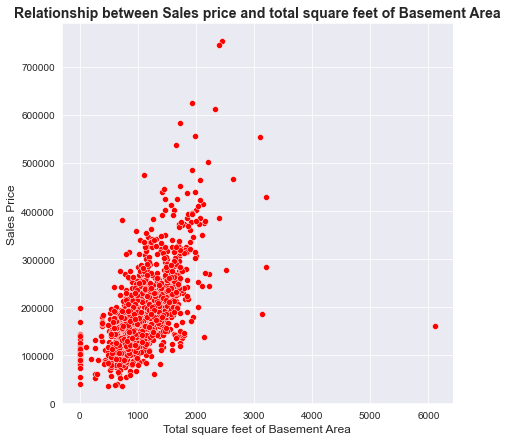

In [16]:
plt.figure(figsize=(7,7))
title_kws = dict(fontsize = 14, fontweight = 800)
label_kws = dict(fontsize = 12, fontweight = 500)
sns.scatterplot(data = data, x = 'TotalBsmtSF', y = 'SalePrice', color = 'red')
plt.xlabel('Total square feet of Basement Area', label_kws)
plt.ylabel('Sales Price', label_kws)
plt.title("Relationship between Sales price and total square feet of Basement Area", title_kws)
plt.show()

### Scatter plot of Sales Price and Total square feet of Basement Area

- In here also linear positive relationship is visible

In [17]:
df1 = data[['GrLivArea','TotalBsmtSF','SalePrice']]

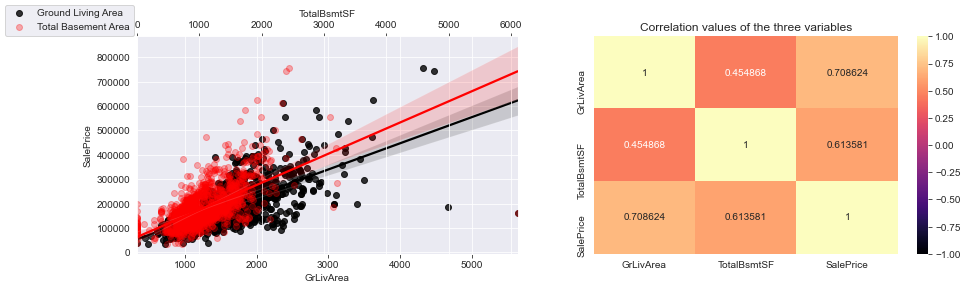

In [18]:
fig, (ax1,ax3) = plt.subplots(nrows = 1,ncols=2, figsize = (15,4) )
sns.regplot(data = data, 
            x = 'GrLivArea', 
            y = 'SalePrice', 
            ax = ax1 , 
            label= "Ground Living Area",
            color = 'black',
           scatter_kws = {'alpha':0.8})
ax2 = plt.twiny(ax = ax1)
sns.regplot(data = data, 
            x = 'TotalBsmtSF', 
            y = 'SalePrice', 
            ax = ax2, 
            label = "Total Basement Area",
           color = 'red',
           scatter_kws = {'alpha':0.3});
ax1.figure.legend(loc = 'upper left')
sns.heatmap(df1.corr(), annot = True, fmt = 'g', vmin = -1, vmax = 1, cmap='magma', ax=ax3, );
ax3.set_title("Correlation values of the three variables");

### Regression plot and Heat Map of sale price, Total basement area and Ground living area

- According to the graphs, Ground living area and Sale price are highly correlated with 0.708624 correlation coefficient value.

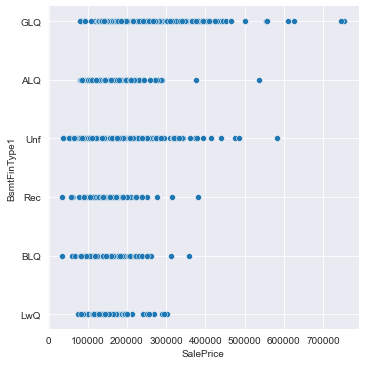

In [19]:
sns.relplot(data = data, x='SalePrice', y='BsmtFinType1');

### Visual issue in the graph?

- Since one of the varaible, in here 'BsmtFinType1' is a categorical varaible, more closer relationship between the other variable and this variable cannot be identified using normal scatter plots. those scatter plots best works with both quantitative variables.

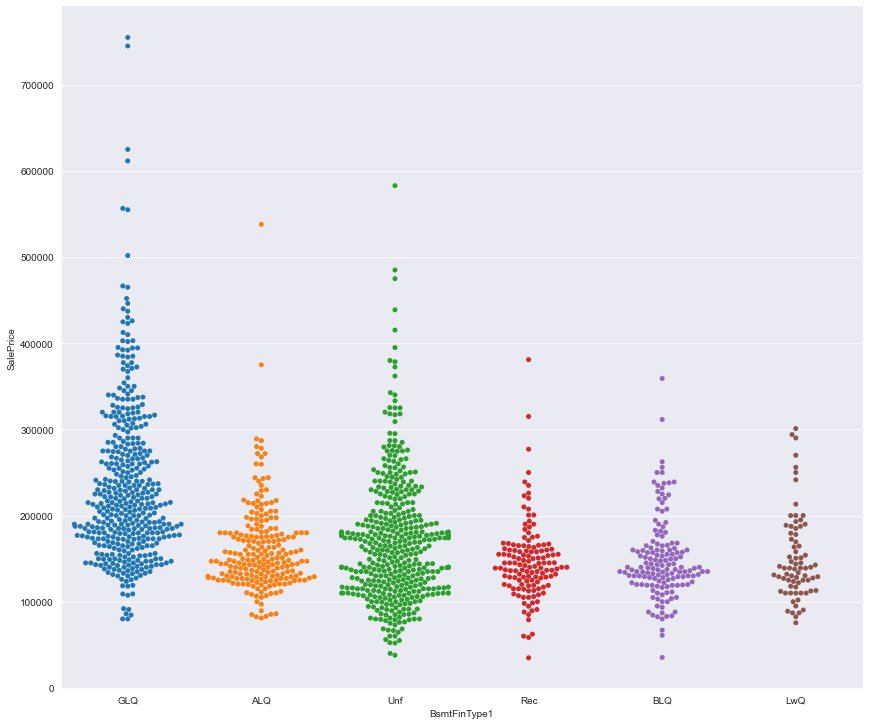

In [20]:
sns.catplot(data = data, x = 'BsmtFinType1', y= 'SalePrice', kind = 'swarm', height = 10, aspect = 1.2 );

### Swarm plot interpretation

- More scatters are spreaded acroos high prices when the rating of the best finished area is Good living quarters.
- And when the basement is unfinished or average living quarters, prices ranges are somewhat low.
- even when the basement is average rec room or below average living quarters or low qaulity, price ranges are recorded as low.

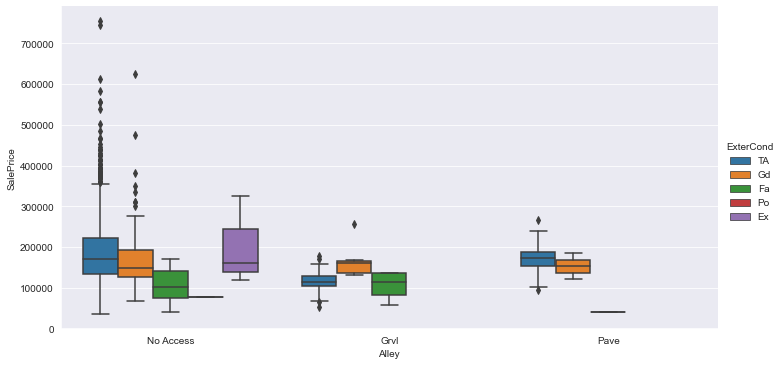

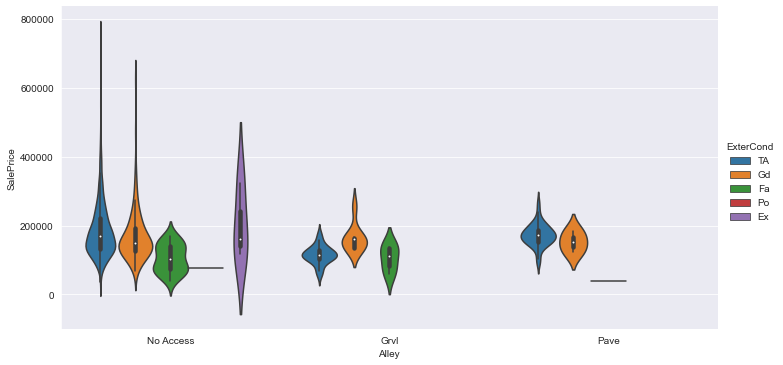

In [23]:
sns.catplot(data = data, x = 'Alley', y = 'SalePrice', hue = 'ExterCond', kind = 'box', aspect = 2);
sns.catplot(data = data, x = 'Alley', y = 'SalePrice', hue = 'ExterCond', kind = 'violin', aspect = 2);

### Interpretations

- Becuase of the less data availability for some categories in selected varaiables, it is hard for users to identify any distrubutions patterns using KDE plots.
- But from violin plolts distributions patterns are easily identified and visible when compared to KDE plots.
- Thorugh violin plots and box plots, idea about the quantiles and whiskers also can be identified which an added advantage of these plots.
- Major drawback is, since no access category has more data points, graphs of other categories are smaller when compared to other graphs which results in lower interpretability.

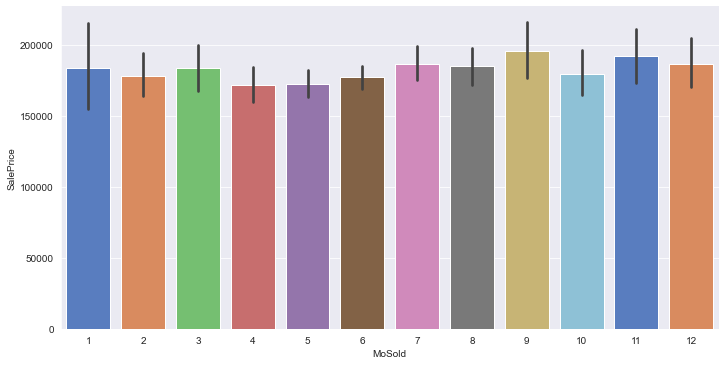

In [27]:
sns.catplot(data = data, x = 'MoSold', y= 'SalePrice', kind = 'bar', aspect = 2, palette='muted');

### Avrage Sales Price according to the month

- Average sales prices have some fluctuations according to the graph.
- highest prices are recorded in the 9th month.
- Lowest in the 4th month.
- There can be external factors for those price changes like seasonal patterns and economic confitions.